<a href="https://colab.research.google.com/github/Rakhi0402/Credit-Card-Approval-Predictor/blob/main/Credit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('application_record.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
df= pd.read_csv('application_record.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313062 entries, 0 to 313061
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   313062 non-null  int64  
 1   CODE_GENDER          313062 non-null  object 
 2   FLAG_OWN_CAR         313062 non-null  object 
 3   FLAG_OWN_REALTY      313062 non-null  object 
 4   CNT_CHILDREN         313062 non-null  int64  
 5   AMT_INCOME_TOTAL     313062 non-null  float64
 6   NAME_INCOME_TYPE     313062 non-null  object 
 7   NAME_EDUCATION_TYPE  313062 non-null  object 
 8   NAME_FAMILY_STATUS   313061 non-null  object 
 9   NAME_HOUSING_TYPE    313061 non-null  object 
 10  DAYS_BIRTH           313061 non-null  float64
 11  DAYS_EMPLOYED        313061 non-null  float64
 12  FLAG_MOBIL           313061 non-null  float64
 13  FLAG_WORK_PHONE      313061 non-null  float64
 14  FLAG_PHONE           313061 non-null  float64
 15  FLAG_EMAIL       

In [7]:
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,1
NAME_HOUSING_TYPE,1


In [9]:
 #For 'OCCUPATION_TYPE', impute missing values with 'Unknown'
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Unknown')

In [11]:
label_encoder = LabelEncoder()
df['CODE_GENDER'] = label_encoder.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR'] = label_encoder.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df['FLAG_OWN_REALTY'])
df['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df['NAME_FAMILY_STATUS'])
df['OCCUPATION_TYPE'] = label_encoder.fit_transform(df['OCCUPATION_TYPE'])
df['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df['NAME_HOUSING_TYPE'])

Epoch 1: Train Accuracy = 98.45%, Test Accuracy = 98.51%
Epoch 2: Train Accuracy = 98.45%, Test Accuracy = 98.51%
Epoch 3: Train Accuracy = 98.45%, Test Accuracy = 98.51%
Epoch 4: Train Accuracy = 98.45%, Test Accuracy = 98.51%
Epoch 5: Train Accuracy = 98.45%, Test Accuracy = 98.51%
Epoch 6: Train Accuracy = 93.48%, Test Accuracy = 93.53%
Epoch 7: Train Accuracy = 98.44%, Test Accuracy = 98.51%
Epoch 8: Train Accuracy = 98.44%, Test Accuracy = 98.51%
Epoch 9: Train Accuracy = 98.45%, Test Accuracy = 98.51%
Epoch 10: Train Accuracy = 98.44%, Test Accuracy = 98.50%
Epoch 11: Train Accuracy = 98.44%, Test Accuracy = 98.51%
Epoch 12: Train Accuracy = 98.45%, Test Accuracy = 98.51%
Epoch 13: Train Accuracy = 98.44%, Test Accuracy = 98.51%
Epoch 14: Train Accuracy = 98.24%, Test Accuracy = 98.26%
Epoch 15: Train Accuracy = 98.44%, Test Accuracy = 98.51%
Epoch 16: Train Accuracy = 98.12%, Test Accuracy = 98.14%
Epoch 17: Train Accuracy = 98.44%, Test Accuracy = 98.51%
Epoch 18: Train Accurac

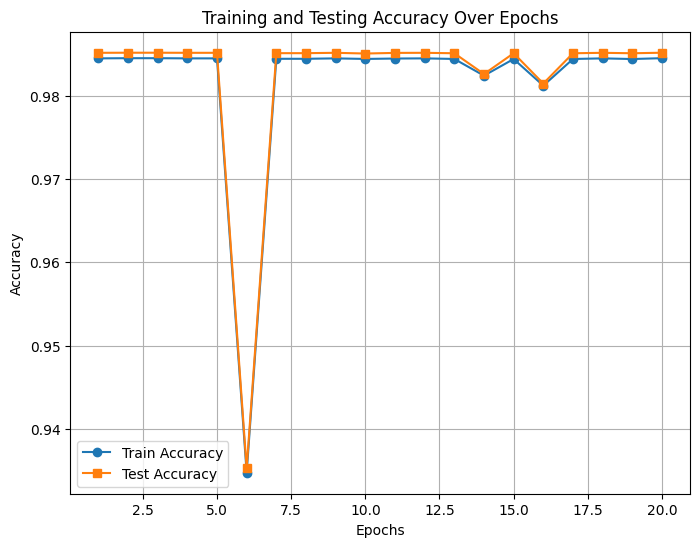

In [31]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress warnings

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Assume df is already loaded

# Calculate age
df['AGE'] = abs(df['DAYS_BIRTH']) // 365  # Convert days to years

# Define approval status based on given criteria
df['APPROVAL_STATUS'] = (
    (df['AMT_INCOME_TOTAL'] >= 30000) &
    (df['DAYS_EMPLOYED'] >= 180) &
    (df['CNT_FAM_MEMBERS'] <= 4) &
    (df['AGE'] >= 18) &
    (df['AGE'] <= 60) &
    (df['FLAG_OWN_CAR'] == 1) &
    (df['FLAG_OWN_REALTY'] == 1)
).astype(int)

# Define features and target variable
X = df.drop(['APPROVAL_STATUS'], axis=1)
y = df['APPROVAL_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize SGDClassifier with better settings
model = SGDClassifier(loss="log_loss", max_iter=1, warm_start=True, eta0=0.001, learning_rate='optimal')

# Train for 20 epochs
train_accuracies = []
test_accuracies = []
epochs = 20

for epoch in range(epochs):
    model.fit(X_train, y_train)  # Incremental training
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch + 1}: Train Accuracy = {train_acc * 100:.2f}%, Test Accuracy = {test_acc * 100:.2f}%")

# Final evaluation after all epochs
final_train_acc = train_accuracies[-1]
final_test_acc = test_accuracies[-1]

print(f"\nFinal Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Testing Accuracy: {final_test_acc * 100:.2f}%")

# Confusion matrix & classification report
y_test_pred = model.predict(X_test)
print("\nFinal Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nFinal Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Over Epochs')
plt.legend()
plt.grid()
plt.show()
